**Introduction**

In today's lesson, we're looking at programming languages and how much one programming langauge is used, generating a csv from StackExchange to use for our purposes. The oldest language still in use right now is FORTRAN. But we can count the number of times a language is put on the tags of a stackoverflow post in order to make an educated guess on the usage of each language.

Things to learn today:
1. Data visualization and chart creation with Matplotlib
2. Pivot, group and manipulate data using pandas library
3. Working with timestamps and time-series data
4. Style and customize a chart however we like

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

I did all that and generated the csv file, the titles were all already created, I just need to fill in the code as per the course now

## Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

PS: The parameters passed were derived from the docs

In [3]:
df = pd.read_csv('QueryResults.csv',header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [5]:
df.tail()

,DATE,TAG,POSTS
2798,2025-05-01 00:00:00,php,309
2799,2025-05-01 00:00:00,python,1712
2800,2025-05-01 00:00:00,r,334
2801,2025-05-01 00:00:00,ruby,31
2802,2025-05-01 00:00:00,swift,218


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [6]:
df.shape

(2803, 3)

**Challenge**: Count the number of entries in each column of the dataframe

PS: I had three different code segments for each column, but apparently count() can do it all at once, and it doesn't count NaN either

In [7]:
# int(df['DATE'].isna().count())
df.count()

,0
DATE,2803
TAG,2803
POSTS,2803


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
df[['TAG', 'POSTS']].groupby('TAG').sum()

,POSTS
TAG,
assembly,45093
c,407886
c#,1624699
c++,814407
delphi,52487
go,74399
java,1919644
javascript,2530381
perl,68342


In the course solution, it didn't include the column filter part, but still got the same output, weird, mine includes the date part as well. I wonder how

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [9]:
df[["TAG", "POSTS"]].groupby('TAG').count().sort_values(by="POSTS")

,POSTS
TAG,
go,187
swift,193
r,200
assembly,202
java,202
delphi,202
c++,202
c,202
python,202


This time the solution included all the columns, so I've done good by filtering, since mostly the data would be redundant. I also sorted the data, which the solution didn't do.

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
df["DATE"][1]

'2008-08-01 00:00:00'

In [11]:
df.DATE[1]

'2008-08-01 00:00:00'

We can use both of the above methods to get a single cell from the dataframe, the second method is for when there is no space in the column name.

In [12]:
type(df.DATE[1])

str

We can see that the date is stored as a string so we won't get the advantages that comes with a DateTime type, so we will need to convert it to a datetime type

In [13]:
type(pd.to_datetime(df.DATE[1]))

pandas._libs.tslibs.timestamps.Timestamp

Now that we know how to convert to a Timestamp object, let's convert the entire dataframe column for date into the same format

In [14]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation

We got a new test dataframe to learn how to pivot our table so that we can get one of the categories to its own column. We can test it in the dataframe below


In [15]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [16]:
test_df.shape

(8, 3)

In [17]:
test_df.pivot(index="Age", columns="Actor", values="Power")

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


The index is the categories for the rows, columns is the categories for the columns, and the values we already know

If any value is empty, the method will put a NaN value in its stead

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [18]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.shape

(203, 14)

In [19]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,319.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,303.0,1983.0,805.0,112.0,NaN,1144.0,720.0,128.0,602.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,952.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [20]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2025-01-01,68.0,320.0,1128.0,687.0,56.0,133.0,1157.0,1413.0,25.0,509.0,2682.0,520.0,50.0,340.0
2025-02-01,60.0,276.0,980.0,575.0,58.0,96.0,923.0,1132.0,15.0,345.0,2173.0,499.0,50.0,305.0
2025-03-01,60.0,307.0,915.0,679.0,53.0,97.0,891.0,1120.0,16.0,332.0,2213.0,485.0,46.0,296.0
2025-04-01,49.0,205.0,649.0,515.0,37.0,64.0,794.0,785.0,15.0,254.0,1736.0,398.0,31.0,216.0
2025-05-01,39.0,223.0,635.0,527.0,38.0,74.0,709.0,787.0,16.0,309.0,1712.0,334.0,31.0,218.0


Now we want to count the number of entries per programming language, we've already done this another way above, let's see if this matches up

In [21]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [22]:
reshaped_df.count()

,0
TAG,
assembly,202
c,202
c#,203
c++,202
delphi,202
go,187
java,202
javascript,202
perl,202


Though every language has its own column, the count() method returns a different value for each column since some values are not available, and those are not counted

Now we don't want the values to be NaN but instead 0 because we don't want any languages to be skipped, if they were not used at a certain time, it would mean there were 0 posts. So let's change that up for now. There's two methods that give the same output

In [23]:
reshaped_df.fillna(0, inplace= True)
# reshaped_df = reshaped_df.fillna(0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,319.0,1638.0,752.0,104.0,0.0,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,303.0,1983.0,805.0,112.0,0.0,1144.0,720.0,128.0,602.0,504.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,952.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


Since we're using inplace, we don't need to reassign it to itself, but we could go that route as well.

Now we can check if there's any NaN values left by using the following chained combo:

In [24]:
bool(reshaped_df.isna().values.any())

False

The course solution showed it as False even without the bool typecasting, but since mine gave np.__False or something, I had to use it to cast

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

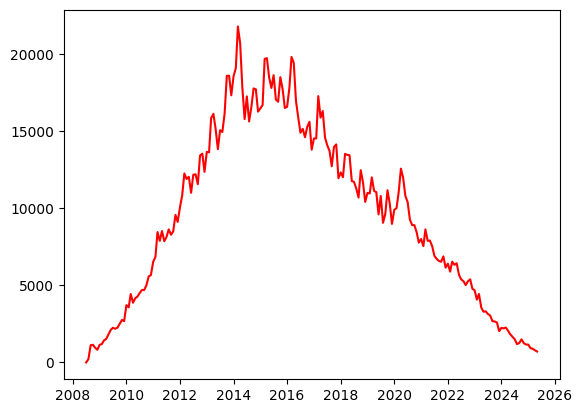

In [25]:
plt.plot(reshaped_df['java'], 'r-')

Tried to play around, and found out the y values were already brought in and I didn't need to play around and find out how to give the date values. Cool.

We can also use the format string to make the graph look somewhat different.

For example the 'r-' I used above makes it a line grpah with a continuous line and red color

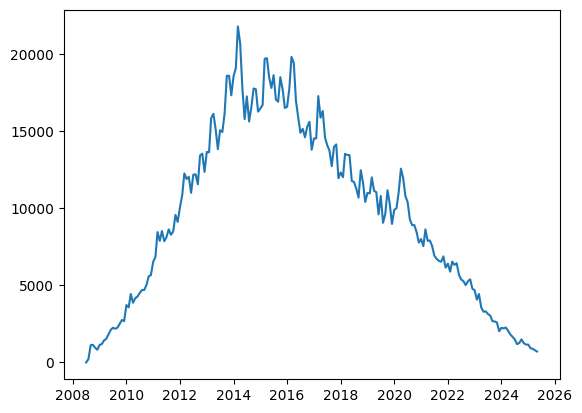

In [26]:
plt.plot(reshaped_df.index, reshaped_df.java)

This was how the course solution implemented it, hmm I don't see any difference in the output, but I didn't know how to use .index because I didn't see it in the docs.

Now since we know the data we want to work with, we can add some styling to the chart using the following methods, and maybe set up the bounds from what we know

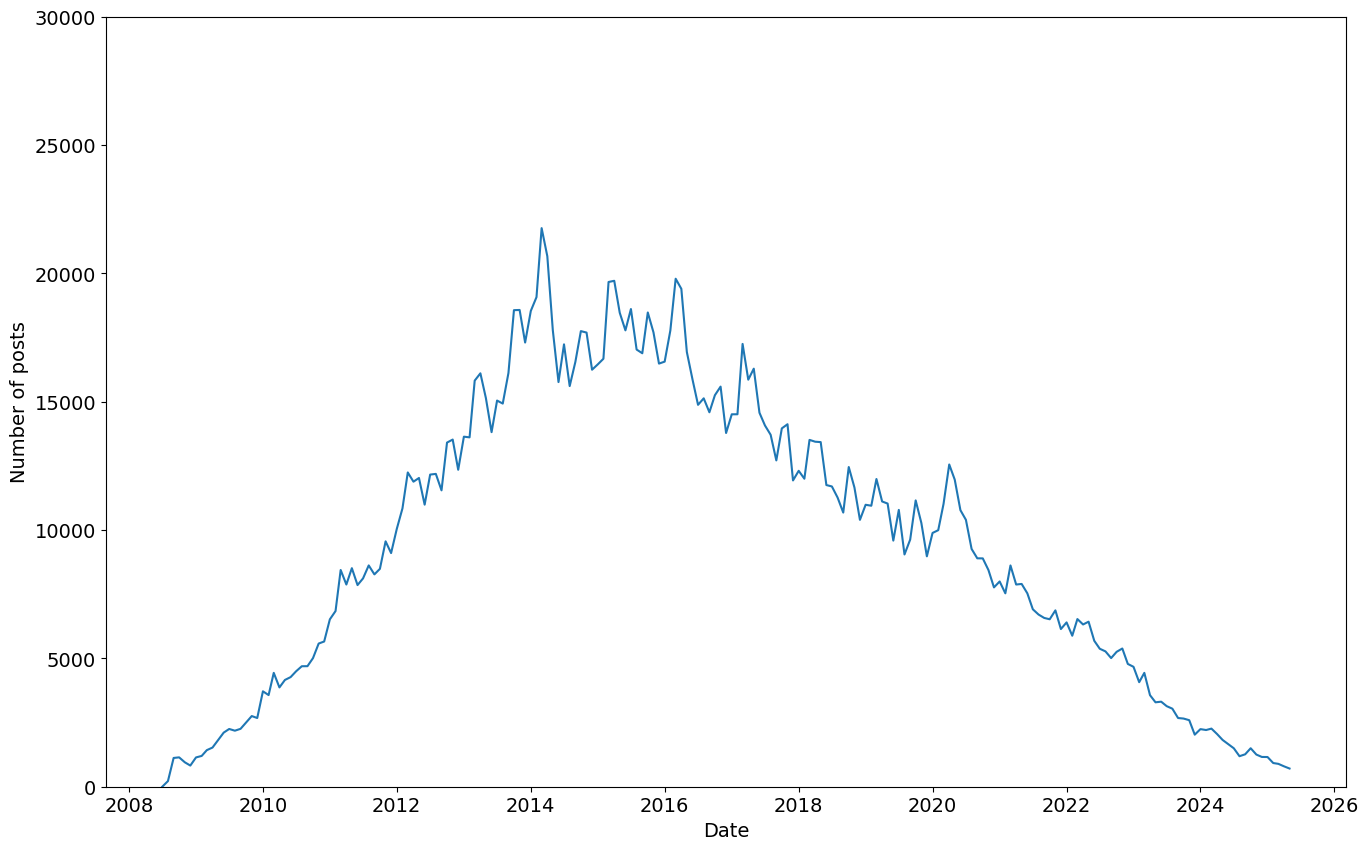

In [27]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 30000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

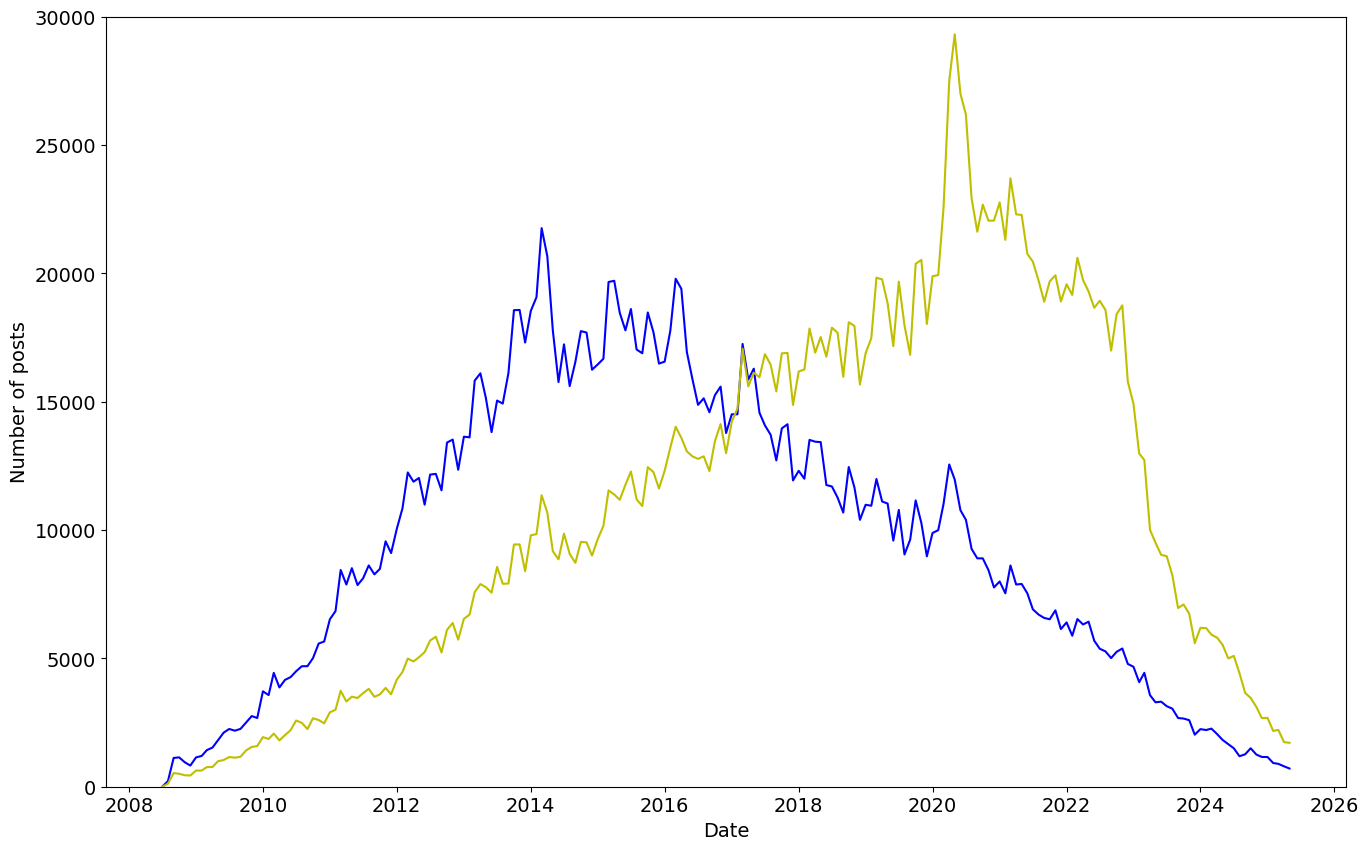

In [28]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 30000)
plt.plot(reshaped_df.index, reshaped_df.java, "b", reshaped_df.python, "y")

In the solution, the plot was instead divided into two different lines. I looked at the documentation that said we could plot both with the same plot method.

But if we want to plot every language together, we need to iterate it plotting all one at a time. But we may need to make adjustments because we don't have labels in this one. We will need to add a legend as well.

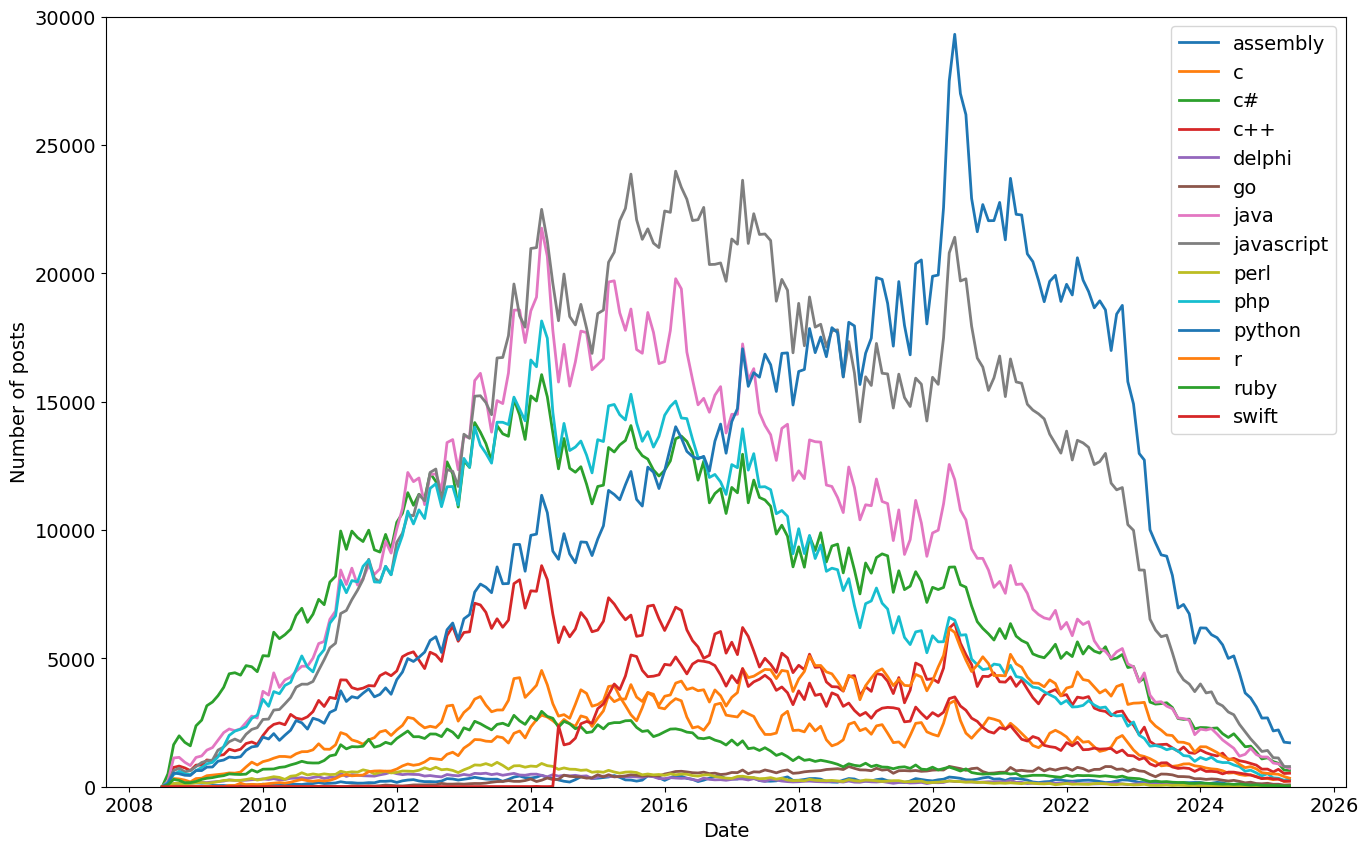

In [31]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 30000)
for col in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[col], linewidth=2, label=reshaped_df[col].name)
plt.legend(fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

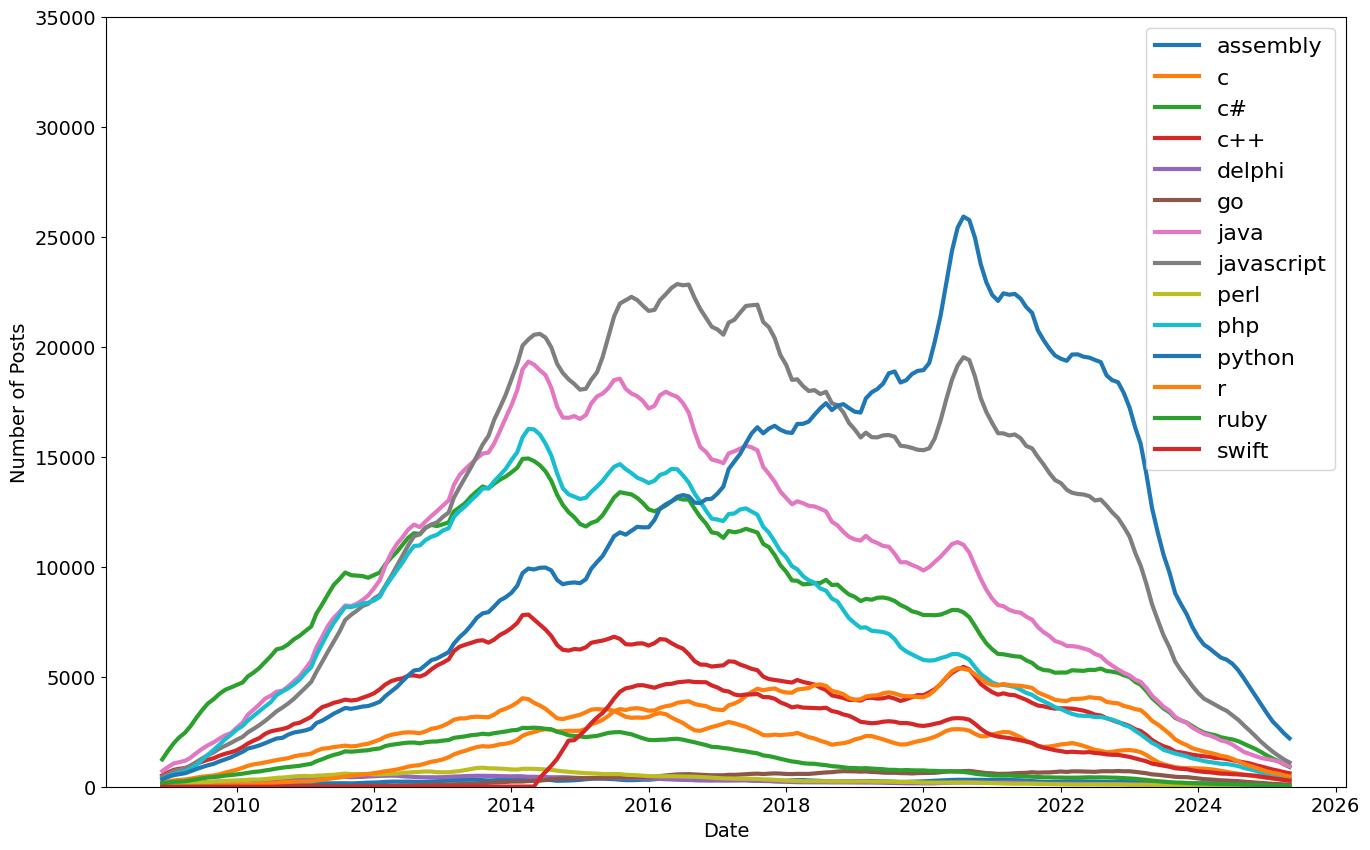

In [36]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

# This code segment I simply copied off the solutions code because it got redundant
# I played with window size and it is smoother the more I increase the value
# too high and the graph shape may lose too much information